In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [102]:
df = pd.read_csv('Hackathon_Dataset.csv')

In [103]:
#df.info()

<AxesSubplot:>

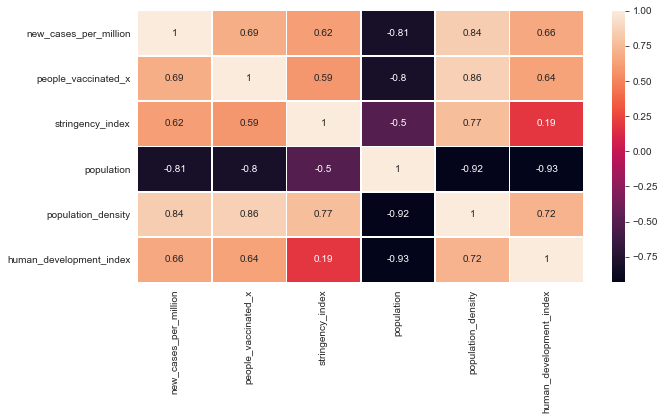

In [104]:
numerical_features = x.columns
plt.figure(figsize=(10,5))
sb.heatmap(df[numerical_features].corr(),annot=True, linewidth= 0.5)

# XGBOOST Model

In [105]:
import xgboost as xgb

X = df[['new_cases_per_million','people_vaccinated_x','stringency_index','population','population_density','human_development_index']]
y = df['new_cases_per_million']
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [107]:
xgbr = xgb.XGBRegressor(verbosity=0) 

In [108]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [109]:
y_preds = xgbr.predict(X_test)

In [110]:
mae = mean_absolute_error(y_test, y_preds)
rms = mean_squared_error(y_test, y_preds, squared=False)

print("RMSE: %f" % (rms))
print("MAE: %f" % (mae))

RMSE: 18.199423
MAE: 12.006183
